# Analyzing CIA Factbook Data Using SQLite and Python

## Introduction

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:
- **population** - The population as of 2015.
- **population_growth** - The annual population growth rate, as a percentage.
- **area** - The total land and water area.

The original SQLite database, **factbook.db**, can be downloaded from [this GitHub repo](https://github.com/factbook/factbook.sql/releases). However, we have taken it from the DataQuest guided project page.

In this guided project, we'll explore the Python SQLite workflow to explore, analyze and visualize data from this database.

## Initializing libraries and variables

We will work with **sqlite3** and **pandas** packages. Also we need to open connection to the factbook.db.

In [1]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("my_datasets/factbook.db")

## Exploring table names

Let's first explore the file in order to discover the different table names:

In [2]:
#We use the conn variable that we opened before
q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


## Exploring "facts" table

Let's check the first 5 rows in "facts" table:

In [3]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


## "facts" table dictionary

Here are the descriptions for some of the columns:
- **name** - The name of the country.
- **area** - The total land and sea area of the country.
- **population** - The country's population.
- **population_growth**- The country's population growth as a percentage.
- **birth_rate** - The country's birth rate, or the number of births a year per 1,000 people.
- **death_rate** - The country's death rate, or the number of death a year per 1,000 people.
- **area** - The country's total area (both land and water).
- **area_land** - The country's land area in square kilometers.
- **area_water** - The country's waterarea in square kilometers.

## "facts" summary statistics

Let's now check:
- Minimum population
- Maximum population
- Minimum population growth
- Maximum population growth

In [4]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


It seems weird to have a country with 0 people and another one with 7.000 million people. Let's dig into that:

In [5]:
q = "SELECT name FROM facts WHERE population = 0"
pd.read_sql_query(q, conn)

,name
0,Antarctica


In [6]:
q = "SELECT name FROM facts WHERE population = 7256490011"
pd.read_sql_query(q, conn)

,name
0,World


We can see there are 2 special entries in the database: **Antarctica** and **the World**. Both are not countries and have special population values that affects directly to our queries.

## Ploting Histograms

Now we can plot some histograms for different fields, excluding the 2 exceptions that we previously found.
We want to analyze the following columns:
- population
- population_growth
- birth_rate
- death_rate

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000295E7AD1EB8>,
      dtype=object)

<Figure size 432x288 with 0 Axes>

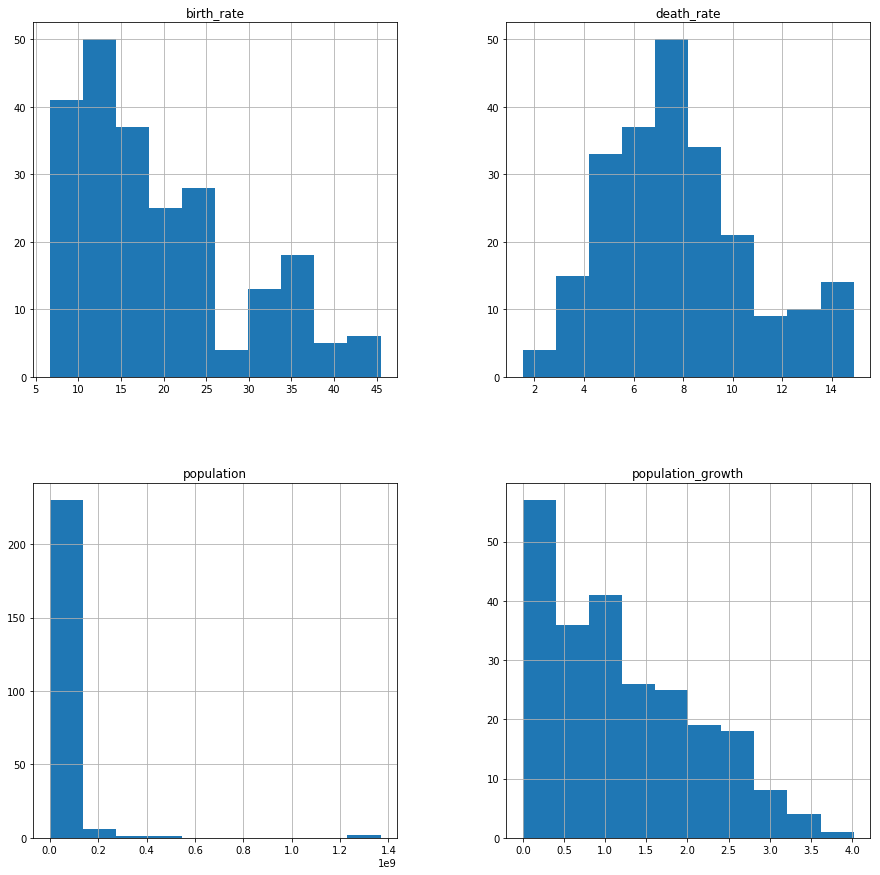

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot()

q="""
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT MAX(population) FROM facts) AND population != (SELECT MIN(population) FROM facts)
"""

pd.read_sql_query(q, conn).hist(figsize=(15,15))